In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error, mean_squared_log_error


In [2]:
# Read data
df = pd.read_csv("../../MBB.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/2/2018,10696.2,10273.2,10696.2,10212.7,19.00M,4.53%
1,1/3/2018,10595.5,10716.3,10817.0,10555.2,18.30M,-0.94%
2,1/4/2018,10615.6,10655.9,10696.2,10535.0,15.69M,0.19%
3,1/5/2018,10535.0,10635.7,10655.9,10454.5,23.65M,-0.76%
4,1/8/2018,11058.8,10514.9,11058.8,10494.7,22.19M,4.97%
...,...,...,...,...,...,...,...
1487,12/15/2023,18050.0,18050.0,18200.0,18000.0,5.54M,0.00%
1488,12/18/2023,18000.0,18050.0,18150.0,17950.0,5.28M,-0.28%
1489,12/19/2023,18150.0,18000.0,18200.0,17950.0,5.90M,0.83%
1490,12/20/2023,18150.0,18150.0,18200.0,18050.0,3.09M,0.00%


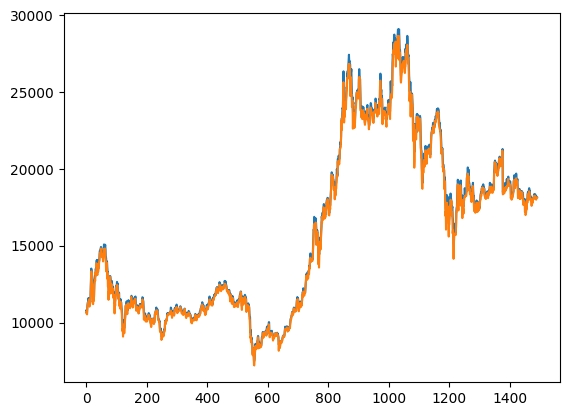

In [3]:
#Choose the independent,dependent variable 
y = df[["Price"]] # predictor 
X= df[["High"]] #independent variable
plt.plot(X)
plt.plot(y)
plt.show()

In [4]:
# Split the data into training, testing sets by 8:2
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [5]:
# # Define the parameter grid
# # Define a dictionary 'params' where keys are hyperparameters of the XGBoost model,
# # and values are lists of possible values for each hyperparameter
# params = {
#     'max_depth': [3, 7],
#     'learning_rate': [0.05, 0.01, 0.001],
#     'n_estimators': [700, 1000],
#     'colsample_bytree': [0.5,1]
# }

# # Create an XGBRegressor instance
# xgbr = XGBRegressor()

# # Create a GridSearchCV instance
# model = GridSearchCV(
#     estimator=xgbr,
#     param_grid=params,
#     scoring='neg_mean_squared_error',
#     verbose=1
# )

# # Assuming X and y are your feature matrix and target variable
# model.fit(X_train, y_train)
# # Print the best parameters and lowest RMSE
# print("Best parameters:", model.best_params_)
# print("Lowest RMSE:", (-model.best_score_)**(1/2.0))

In [6]:
# Add model from searching  the best model which is evaluted by mean square root 
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000,colsample_bytree=0.5, learning_rate=0.01, max_depth=3)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [7]:
#make the predictions
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,1)

In [8]:
#calculate some metrics
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
msle = mean_squared_log_error(y_test, y_pred)
print("MAPE:", mape)
print("MAE: ",  mae)
print("RMSE:", rmse)
print("MSLE: ", msle)

MAPE: 0.8272135994406149
MAE:  148.5175820443144
RMSE: 202.45454686803438
MSLE:  0.00013271806775321714


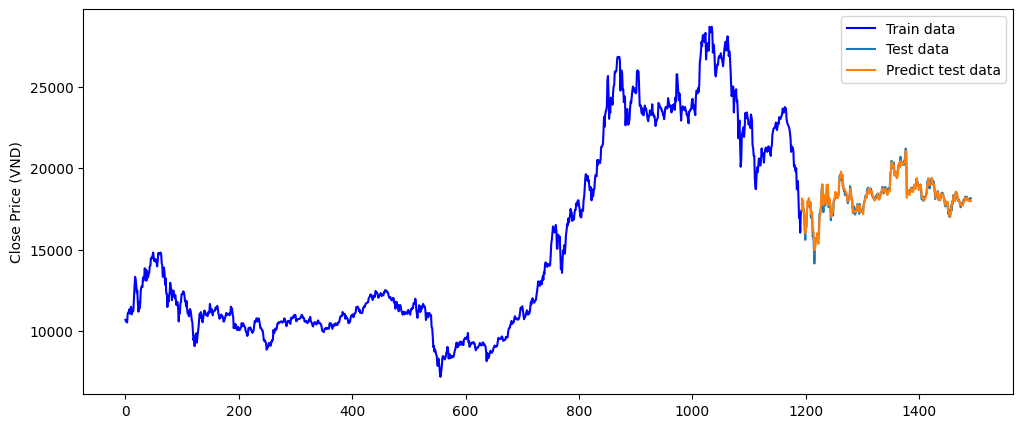

In [9]:
#vẽ mô hình
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data', color = 'b')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred, label='Predict test data')
plt.ylabel('Close Price (VND)')
plt.legend()
plt.show()

In [10]:
#Take the last value from the dataset
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[18150.]])

In [11]:
#Make a prediction for next 30 days
x_next_30_day = []

for i in range(30):
    x_pred_next = model.predict(last_data)
    x_next_30_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

print("Ket qua du doan XGBoost ", x_next_30_day)


Ket qua du doan XGBoost  [array([17974.795], dtype=float32), array([17730.98], dtype=float32), array([17385.727], dtype=float32), array([17019.895], dtype=float32), array([16895.924], dtype=float32), array([16403.309], dtype=float32), array([16010.112], dtype=float32), array([15699.023], dtype=float32), array([15358.878], dtype=float32), array([14973.523], dtype=float32), array([14802.463], dtype=float32), array([14702.054], dtype=float32), array([14301.405], dtype=float32), array([14202.044], dtype=float32), array([13903.904], dtype=float32), array([13774.822], dtype=float32), array([13558.705], dtype=float32), array([13222.181], dtype=float32), array([12968.7], dtype=float32), array([12652.651], dtype=float32), array([12529.403], dtype=float32), array([12354.932], dtype=float32), array([12164.28], dtype=float32), array([11999.153], dtype=float32), array([11819.048], dtype=float32), array([11686.009], dtype=float32), array([11501.218], dtype=float32), array([11346.382], dtype=float32)

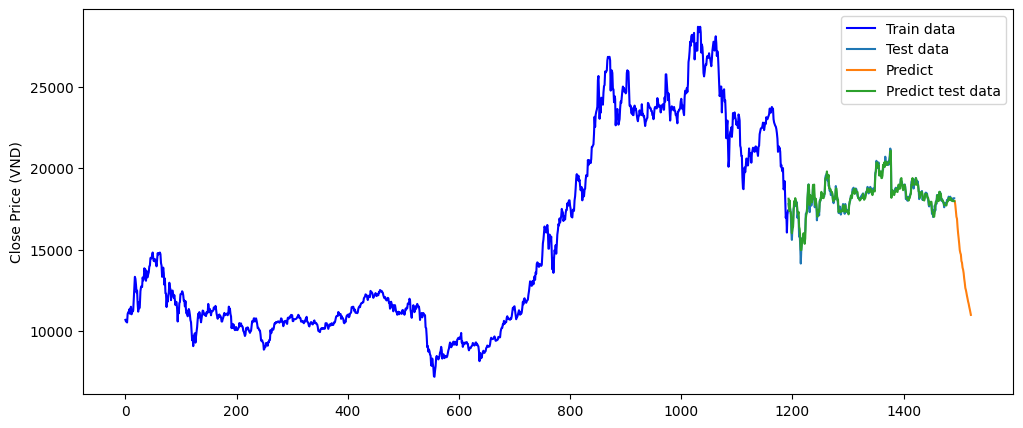

In [13]:
#vẽ mô hình
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data', color = 'b')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30),x_next_30_day, label='Predict')
plt.plot(X_test.index, y_pred, label='Predict test data')
plt.ylabel('Close Price (VND)')
plt.legend()
plt.show()

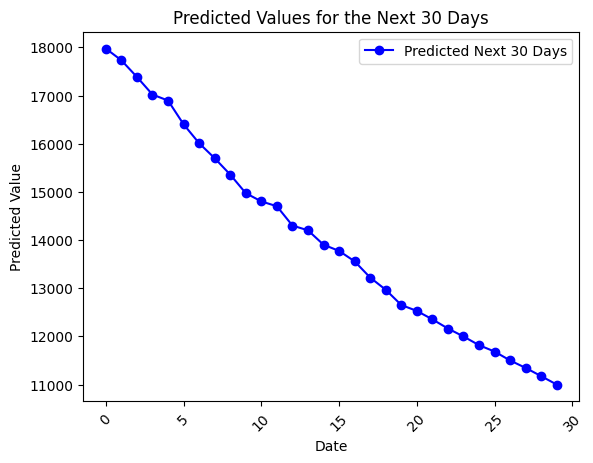

In [14]:
# Vẽ biểu đồ
plt.plot(x_next_30_day, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()